# Price Optimization Project 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from random import randint
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
filepath = 'Price_Optimization_Data.csv'
df = pd.read_csv(filepath)
df

C:\Users\STSC\AppData\Local\Temp\ipykernel_19372\2664567221.py:2: DtypeWarning: Columns (7,10,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


,Client,Application,Condition type,Sales Org.,Distr. Channel,Customer Code,Material,Release status,Valid to,Valid From,...,Upper limit,Planned cond.value,Cumulative value,Cumulat.accruals val.,CdCur,Planned basis,Accruals,Min.cond.base value,Max.cond.base value,Max.condit.value
0,1,A,PR,2,3,10,1,C,31.12.9999,25.10.2021,...,0,0,0,0,USD,0,0,0,0,0
1,1,A,PR,2,3,10,2,C,31.12.9999,08.02.2021,...,0,0,0,0,USD,0,0,0,0,0
2,1,A,PR,2,3,10,3232,C,31.12.9999,08.02.2021,...,0,0,0,0,USD,0,0,0,0,0
3,1,A,PR,2,3,10,5263,C,31.12.9999,12.07.2021,...,0,0,0,0,USD,0,0,0,0,0
4,1,A,PR,2,3,10,5855,C,31.12.9999,12.07.2021,...,0,0,0,0,USD,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545675,1,A,PR,2,3,EJ,231,NaN,31.07.2021,01.02.2021,...,0,0,0,0,USD,0,0,0,0,0
545676,1,A,PR,2,3,EJ,231,NaN,31.01.2022,01.08.2021,...,0,0,0,0,USD,0,0,0,0,0
545677,1,A,PR,2,3,EJ,231,NaN,31.01.2024,01.02.2022,...,0,0,0,0,USD,0,0,0,0,0
545678,1,A,PR,2,3,EJ,232,NaN,31.01.2021,15.01.2021,...,0,0,0,0,USD,0,0,0,0,0


In [3]:
pd.set_option("display.max_columns", None)
df

,Client,Application,Condition type,Sales Org.,Distr. Channel,Customer Code,Material,Release status,Valid to,Valid From,Proc. status,CondRecNo.,Sequential number of the condition,Application.1,Condition type.1,Number of texts,Scale Type,Scale basis indicator,Condition scale quantity,Condition scale unit of measure,Status,Promotion,Sales deal,AValD,NoOr,InSc,PrSc,Scale quantity,Scale value,Amount,Unit,per,UoM.1,NumCCo,CConDe,Lower limit,Upper limit,Planned cond.value,Cumulative value,Cumulat.accruals val.,CdCur,Planned basis,Accruals,Min.cond.base value,Max.cond.base value,Max.condit.value
0,1,A,PR,2,3,10,1,C,31.12.9999,25.10.2021,ES,2137047919,1,V,ZPR1,A,C,NaN,1,NaN,NaN,NaN,NaN,0,0,0,0,0,0,9.00,USD,1,EA,0,0,0,0,0,0,0,USD,0,0,0,0,0
1,1,A,PR,2,3,10,2,C,31.12.9999,08.02.2021,ES,2111969047,1,V,ZPR1,A,C,NaN,1,NaN,NaN,NaN,NaN,0,0,0,0,0,0,27.40,USD,1,EA,0,0,0,0,0,0,0,USD,0,0,0,0,0
2,1,A,PR,2,3,10,3232,C,31.12.9999,08.02.2021,ES,2111969048,1,V,ZPR1,A,C,NaN,1,NaN,NaN,NaN,NaN,0,0,0,0,0,0,28.74,USD,1,EA,0,0,0,0,0,0,0,USD,0,0,0,0,0
3,1,A,PR,2,3,10,5263,C,31.12.9999,12.07.2021,ES,2128278779,1,V,ZPR1,A,C,NaN,1,NaN,NaN,NaN,NaN,0,0,0,0,0,0,10.04,USD,1,EA,0,0,0,0,0,0,0,USD,0,0,0,0,0
4,1,A,PR,2,3,10,5855,C,31.12.9999,12.07.2021,ES,2128278780,1,V,ZPR1,A,C,NaN,1,NaN,NaN,NaN,NaN,0,0,0,0,0,0,10.00,USD,1,EA,0,0,0,0,0,0,0,USD,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545675,1,A,PR,2,3,EJ,231,NaN,31.07.2021,01.02.2021,50.0,2111536620,1,V,ZPR1,A,C,NaN,1,NaN,NaN,NaN,NaN,0,0,0,0,0,0,79.00,USD,1,EA,0,0,0,0,0,0,0,USD,0,0,0,0,0
545676,1,A,PR,2,3,EJ,231,NaN,31.01.2022,01.08.2021,50.0,2122325871,1,V,ZPR1,A,C,NaN,1,NaN,NaN,NaN,NaN,0,0,0,0,0,0,83.00,USD,1,EA,0,0,0,0,0,0,0,USD,0,0,0,0,0
545677,1,A,PR,2,3,EJ,231,NaN,31.01.2024,01.02.2022,50.0,2141845553,1,V,ZPR1,A,C,NaN,1,NaN,NaN,NaN,NaN,0,0,0,0,0,0,83.00,USD,1,EA,0,0,0,0,0,0,0,USD,0,0,0,0,0
545678,1,A,PR,2,3,EJ,232,NaN,31.01.2021,15.01.2021,50.0,2104575364,1,V,ZPR1,A,C,NaN,1,NaN,NaN,NaN,NaN,0,0,0,0,0,0,79.00,USD,1,EA,0,0,0,0,0,0,0,USD,0,0,0,0,0


# EDA

In [4]:
df.columns

Index(['Client', 'Application', 'Condition type', 'Sales Org.',
       'Distr. Channel', 'Customer Code', 'Material', 'Release status',
       'Valid to', 'Valid From', 'Proc. status', 'CondRecNo.',
       'Sequential number of the condition', 'Application.1',
       'Condition type.1', 'Number of texts', 'Scale Type   ',
       'Scale basis indicator', 'Condition scale quantity ',
       'Condition scale unit of measure  ', 'Status', 'Promotion',
       'Sales deal', 'AValD', 'NoOr', 'InSc', 'PrSc', 'Scale quantity',
       'Scale value', 'Amount', 'Unit', 'per', 'UoM.1', 'NumCCo', 'CConDe',
       'Lower limit', 'Upper limit', 'Planned cond.value', 'Cumulative value',
       'Cumulat.accruals val.', 'CdCur', 'Planned basis', 'Accruals',
       'Min.cond.base value', 'Max.cond.base value', 'Max.condit.value'],
      dtype='object')

In [5]:
df.columns=[s.strip().replace('.','_') for s in df.columns]
df.columns

Index(['Client', 'Application', 'Condition type', 'Sales Org_',
       'Distr_ Channel', 'Customer Code', 'Material', 'Release status',
       'Valid to', 'Valid From', 'Proc_ status', 'CondRecNo_',
       'Sequential number of the condition', 'Application_1',
       'Condition type_1', 'Number of texts', 'Scale Type',
       'Scale basis indicator', 'Condition scale quantity',
       'Condition scale unit of measure', 'Status', 'Promotion', 'Sales deal',
       'AValD', 'NoOr', 'InSc', 'PrSc', 'Scale quantity', 'Scale value',
       'Amount', 'Unit', 'per', 'UoM_1', 'NumCCo', 'CConDe', 'Lower limit',
       'Upper limit', 'Planned cond_value', 'Cumulative value',
       'Cumulat_accruals val_', 'CdCur', 'Planned basis', 'Accruals',
       'Min_cond_base value', 'Max_cond_base value', 'Max_condit_value'],
      dtype='object')

In [6]:
df.columns=[s.strip().replace(' ','_') for s in df.columns]
df.columns

Index(['Client', 'Application', 'Condition_type', 'Sales_Org_',
       'Distr__Channel', 'Customer_Code', 'Material', 'Release_status',
       'Valid_to', 'Valid_From', 'Proc__status', 'CondRecNo_',
       'Sequential_number_of_the_condition', 'Application_1',
       'Condition_type_1', 'Number_of_texts', 'Scale_Type',
       'Scale_basis_indicator', 'Condition_scale_quantity',
       'Condition_scale_unit_of_measure', 'Status', 'Promotion', 'Sales_deal',
       'AValD', 'NoOr', 'InSc', 'PrSc', 'Scale_quantity', 'Scale_value',
       'Amount', 'Unit', 'per', 'UoM_1', 'NumCCo', 'CConDe', 'Lower_limit',
       'Upper_limit', 'Planned_cond_value', 'Cumulative_value',
       'Cumulat_accruals_val_', 'CdCur', 'Planned_basis', 'Accruals',
       'Min_cond_base_value', 'Max_cond_base_value', 'Max_condit_value'],
      dtype='object')

In [7]:
# Renaming Some Columns
df.rename(columns = {'Application_1' : 'Application_2', 'Condition_type_1' : 'Condition_type_2', 'Proc__status': 'Proc_status', 'Distr__Channel': 'Distr_Channel'}, inplace = True)
df.columns

Index(['Client', 'Application', 'Condition_type', 'Sales_Org_',
       'Distr_Channel', 'Customer_Code', 'Material', 'Release_status',
       'Valid_to', 'Valid_From', 'Proc_status', 'CondRecNo_',
       'Sequential_number_of_the_condition', 'Application_2',
       'Condition_type_2', 'Number_of_texts', 'Scale_Type',
       'Scale_basis_indicator', 'Condition_scale_quantity',
       'Condition_scale_unit_of_measure', 'Status', 'Promotion', 'Sales_deal',
       'AValD', 'NoOr', 'InSc', 'PrSc', 'Scale_quantity', 'Scale_value',
       'Amount', 'Unit', 'per', 'UoM_1', 'NumCCo', 'CConDe', 'Lower_limit',
       'Upper_limit', 'Planned_cond_value', 'Cumulative_value',
       'Cumulat_accruals_val_', 'CdCur', 'Planned_basis', 'Accruals',
       'Min_cond_base_value', 'Max_cond_base_value', 'Max_condit_value'],
      dtype='object')

In [8]:
df.shape

(545680, 46)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545680 entries, 0 to 545679
Data columns (total 46 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Client                              545680 non-null  int64  
 1   Application                         545680 non-null  object 
 2   Condition_type                      545680 non-null  object 
 3   Sales_Org_                          545680 non-null  int64  
 4   Distr_Channel                       545680 non-null  int64  
 5   Customer_Code                       545680 non-null  object 
 6   Material                            545680 non-null  int64  
 7   Release_status                      1704 non-null    object 
 8   Valid_to                            545680 non-null  object 
 9   Valid_From                          545680 non-null  object 
 10  Proc_status                         510474 non-null  object 
 11  CondRecNo_                

In [10]:
df.describe()

,Client,Sales_Org_,Distr_Channel,Material,CondRecNo_,Sequential_number_of_the_condition,Condition_scale_quantity,Condition_scale_unit_of_measure,Status,Promotion,Sales_deal,AValD,NoOr,InSc,PrSc,Scale_quantity,Scale_value,Amount,per,NumCCo,CConDe,Lower_limit,Upper_limit,Planned_cond_value,Cumulative_value,Cumulat_accruals_val_,Planned_basis,Accruals,Min_cond_base_value,Max_cond_base_value,Max_condit_value
count,545680.0,545680.0,545680.0,545680.000000,5.456800e+05,545680.0,545680.0,0.0,0.0,0.0,0.0,545680.0,545680.0,545680.0,545680.0,545680.0,545680.0,545680.000000,545680.0,545680.0,545680.0,545680.0,545680.0,545680.0,545680.0,545680.0,545680.0,545680.0,545680.0,545680.0,545680.0
mean,1.0,2.0,3.0,1439.660853,2.121669e+09,1.0,1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,183.725313,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,1384.942253,1.484723e+07,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,735.013948,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1.0,2.0,3.0,1.000000,2.030491e+09,1.0,1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,1.0,2.0,3.0,439.000000,2.105846e+09,1.0,1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,28.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,1.0,2.0,3.0,1043.000000,2.122851e+09,1.0,1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,45.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,1.0,2.0,3.0,2018.000000,2.138059e+09,1.0,1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,122.500000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,2.0,3.0,10152.000000,2.149716e+09,1.0,1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,107315.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
df.Valid_From.unique()

array(['25.10.2021', '08.02.2021', '12.07.2021', '15.03.2021',
       '07.09.2021', '29.11.2021', '01.04.2021', '16.11.2021',
       '17.11.2021', '02.12.2021', '27.04.2021', '14.05.2021',
       '13.07.2021', '13.01.2021', '09.04.2021', '10.12.2021',
       '15.08.2021', '01.06.2021', '01.01.2023', '12.02.2021',
       '31.03.2021', '20.04.2021', '11.06.2021', '23.08.2021',
       '05.01.2021', '14.04.2021', '01.01.2024', '28.09.2021',
       '15.09.2021', '13.10.2021', '09.07.2021', '01.02.2021',
       '24.03.2021', '02.12.9999', '03.06.2021', '16.02.2021',
       '09.06.2021', '14.07.2021', '05.01.2022', '22.07.2021',
       '18.03.2021', '11.05.2021', '21.01.2021', '02.06.2021',
       '18.06.2021', '15.11.2021', '30.03.2021', '30.07.2021',
       '28.07.2021', '12.05.2021', '24.06.2021', '19.04.2021',
       '20.07.2021', '07.05.2021', '07.07.2021', '05.08.2021',
       '24.09.2021', '04.08.2021', '27.10.2021', '10.11.2021',
       '01.12.2021', '22.10.2021', '12.10.2021', '29.01

In [12]:
df.isnull().sum()
# [features for features in df.columns if df[features].isnull().sum()>0]

Client                                     0
Application                                0
Condition_type                             0
Sales_Org_                                 0
Distr_Channel                              0
Customer_Code                              0
Material                                   0
Release_status                        543976
Valid_to                                   0
Valid_From                                 0
Proc_status                            35206
CondRecNo_                                 0
Sequential_number_of_the_condition         0
Application_2                              0
Condition_type_2                           0
Number_of_texts                            0
Scale_Type                                 0
Scale_basis_indicator                 545663
Condition_scale_quantity                   0
Condition_scale_unit_of_measure       545680
Status                                545680
Promotion                             545680
Sales_deal

In [13]:
df['Proc_status'].replace({"ES": 5.0, "10": 10.0, '50': 50.0}, inplace=True)
df

,Client,Application,Condition_type,Sales_Org_,Distr_Channel,Customer_Code,Material,Release_status,Valid_to,Valid_From,Proc_status,CondRecNo_,Sequential_number_of_the_condition,Application_2,Condition_type_2,Number_of_texts,Scale_Type,Scale_basis_indicator,Condition_scale_quantity,Condition_scale_unit_of_measure,Status,Promotion,Sales_deal,AValD,NoOr,InSc,PrSc,Scale_quantity,Scale_value,Amount,Unit,per,UoM_1,NumCCo,CConDe,Lower_limit,Upper_limit,Planned_cond_value,Cumulative_value,Cumulat_accruals_val_,CdCur,Planned_basis,Accruals,Min_cond_base_value,Max_cond_base_value,Max_condit_value
0,1,A,PR,2,3,10,1,C,31.12.9999,25.10.2021,5.0,2137047919,1,V,ZPR1,A,C,NaN,1,NaN,NaN,NaN,NaN,0,0,0,0,0,0,9.00,USD,1,EA,0,0,0,0,0,0,0,USD,0,0,0,0,0
1,1,A,PR,2,3,10,2,C,31.12.9999,08.02.2021,5.0,2111969047,1,V,ZPR1,A,C,NaN,1,NaN,NaN,NaN,NaN,0,0,0,0,0,0,27.40,USD,1,EA,0,0,0,0,0,0,0,USD,0,0,0,0,0
2,1,A,PR,2,3,10,3232,C,31.12.9999,08.02.2021,5.0,2111969048,1,V,ZPR1,A,C,NaN,1,NaN,NaN,NaN,NaN,0,0,0,0,0,0,28.74,USD,1,EA,0,0,0,0,0,0,0,USD,0,0,0,0,0
3,1,A,PR,2,3,10,5263,C,31.12.9999,12.07.2021,5.0,2128278779,1,V,ZPR1,A,C,NaN,1,NaN,NaN,NaN,NaN,0,0,0,0,0,0,10.04,USD,1,EA,0,0,0,0,0,0,0,USD,0,0,0,0,0
4,1,A,PR,2,3,10,5855,C,31.12.9999,12.07.2021,5.0,2128278780,1,V,ZPR1,A,C,NaN,1,NaN,NaN,NaN,NaN,0,0,0,0,0,0,10.00,USD,1,EA,0,0,0,0,0,0,0,USD,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545675,1,A,PR,2,3,EJ,231,NaN,31.07.2021,01.02.2021,50.0,2111536620,1,V,ZPR1,A,C,NaN,1,NaN,NaN,NaN,NaN,0,0,0,0,0,0,79.00,USD,1,EA,0,0,0,0,0,0,0,USD,0,0,0,0,0
545676,1,A,PR,2,3,EJ,231,NaN,31.01.2022,01.08.2021,50.0,2122325871,1,V,ZPR1,A,C,NaN,1,NaN,NaN,NaN,NaN,0,0,0,0,0,0,83.00,USD,1,EA,0,0,0,0,0,0,0,USD,0,0,0,0,0
545677,1,A,PR,2,3,EJ,231,NaN,31.01.2024,01.02.2022,50.0,2141845553,1,V,ZPR1,A,C,NaN,1,NaN,NaN,NaN,NaN,0,0,0,0,0,0,83.00,USD,1,EA,0,0,0,0,0,0,0,USD,0,0,0,0,0
545678,1,A,PR,2,3,EJ,232,NaN,31.01.2021,15.01.2021,50.0,2104575364,1,V,ZPR1,A,C,NaN,1,NaN,NaN,NaN,NaN,0,0,0,0,0,0,79.00,USD,1,EA,0,0,0,0,0,0,0,USD,0,0,0,0,0


In [14]:
df['Proc_status']=np.where(df['Proc_status'].isnull(),df['Proc_status'].mean(),df['Proc_status'])
df['Proc_status'].unique()

array([ 5.        , 10.        , 49.85314629, 50.        , 40.        ])

In [15]:
df.Proc_status.unique()

array([ 5.        , 10.        , 49.85314629, 50.        , 40.        ])

In [16]:
for col in df:
    print(df[col].unique())

[1]
['A']
['PR']
[2]
[3]
['10' '11' '1B' '1F' '1J' '1R' '1V' '1W' '1X' '26' '2A' '2B' '2C' '2I'
 '2M' '2Q' '2U' '2V' '2W' '2X' '2Y' '2Z' '31' '3B' '3C' '3D' '3H' '3I'
 '3J' '3Q' '3R' '3U' '3W' '3X' '3Y' '3Z' '4A' '4D' '4G' '4Q' '4U' '4V'
 '4W' '4X' '4Y' '4Z' '5C' '5D' '5F' '5H' '5J' '5Q' '5U' '5V' '5W' '5X'
 '5Y' '5Z' '6A' '6B' '6F' '6G' '6I' '6Q' '6U' '6V' '6W' '6X' '6Y' '6Z'
 '7B' '7C' '7D' '7F' '7H' '7Q' '7R' '7U' '7V' '7W' '7X' '8A' '8B' '8F'
 '8H' '8R' '8U' '8W' '8X' '8Z' '9G' '9I' '9Q' '9R' '9U' '9V' '9W' '9X'
 '9Z' 'A1' 'A2' 'A3' 'A6' 'A7' 'A9' 'AD' 'AH' 'AI' 'AJ' 'AK' 'AL' 'AM'
 'AN' 'AO' 'AP' 'AR' 'AU' 'AV' 'AX' 'B2' 'B3' 'B4' 'B7' 'BB' 'BC' 'BD'
 'BF' 'BI' 'BK' 'BN' 'BO' 'BP' 'BR' 'BV' 'BW' 'BX' 'BY' 'BZ' 'C1' 'C2'
 'C3' 'C4' 'C8' 'CA' 'CB' 'CC' 'CE' 'CF' 'CG' 'CH' 'CI' 'CJ' 'CK' 'CL'
 'CO' 'CR' 'CT' 'CW' 'CY' 'CZ' 'D3' 'D4' 'DA' 'DC' 'DD' 'DH' 'DI' 'DJ'
 'DK' 'DL' 'DQ' 'DR' 'DS' 'DT' 'DX' 'DY' 'E1' 'E2' 'E3' 'E4' 'E5' 'E6'
 'E7' 'E8' 'E9' 'EA' 'EB' 'ED' 'EE' 'EG' 'EJ']
[    

['ZPR1']
['A']
['C']
[nan 'X']
[1]
[nan]
[nan]
[nan]
[nan]
[0]
[0]
[0]
[0]
[0]
[0]
[  9.    27.4   28.74 ... 700.5  712.5  410.5 ]
['USD' 'EUR' 'CHF' 'GBP' 'SGD' 'THB' 'SEK' 'JPY' 'NZD' 'KRW' 'DKK' 'ILS'
 'HKD' 'AUD' 'TWD' 'ZAR' 'MYR' 'MXN' 'CAD']
[1]
['EA']
[0]
[0]
[0]
[0]
[0]
[0]
[0]
['USD']
[0]
[0]
[0]
[0]
[0]


In [17]:
for col in df:
    print(df[col].value_counts())

1    545680
Name: Client, dtype: int64
A    545680
Name: Application, dtype: int64
PR    545680
Name: Condition_type, dtype: int64
2    545680
Name: Sales_Org_, dtype: int64
3    545680
Name: Distr_Channel, dtype: int64
4V    14850
2U    11079
E6    10718
4Y    10698
3Z    10221
      ...  
6G        6
BP        6
7F        2
4Z        1
26        1
Name: Customer_Code, Length: 191, dtype: int64
1338     406
3635     397
3        396
4        393
5        392
        ... 
10148      1
10149      1
10150      1
10151      1
10152      1
Name: Material, Length: 10152, dtype: int64
C    1607
B      97
Name: Release_status, dtype: int64
31.12.9999    185084
31.01.2022     71518
31.07.2021     65665
31.01.2024     33716
31.12.2021     28153
               ...  
18.06.2021         1
12.10.2021         1
06.01.2021         1
05.12.2023         1
17.10.2021         1
Name: Valid_to, Length: 321, dtype: int64
01.08.2021    74760
01.02.2022    74303
01.01.2021    67118
15.01.2021    33464
01.01.

In [18]:
df.Valid_From.unique()

array(['25.10.2021', '08.02.2021', '12.07.2021', '15.03.2021',
       '07.09.2021', '29.11.2021', '01.04.2021', '16.11.2021',
       '17.11.2021', '02.12.2021', '27.04.2021', '14.05.2021',
       '13.07.2021', '13.01.2021', '09.04.2021', '10.12.2021',
       '15.08.2021', '01.06.2021', '01.01.2023', '12.02.2021',
       '31.03.2021', '20.04.2021', '11.06.2021', '23.08.2021',
       '05.01.2021', '14.04.2021', '01.01.2024', '28.09.2021',
       '15.09.2021', '13.10.2021', '09.07.2021', '01.02.2021',
       '24.03.2021', '02.12.9999', '03.06.2021', '16.02.2021',
       '09.06.2021', '14.07.2021', '05.01.2022', '22.07.2021',
       '18.03.2021', '11.05.2021', '21.01.2021', '02.06.2021',
       '18.06.2021', '15.11.2021', '30.03.2021', '30.07.2021',
       '28.07.2021', '12.05.2021', '24.06.2021', '19.04.2021',
       '20.07.2021', '07.05.2021', '07.07.2021', '05.08.2021',
       '24.09.2021', '04.08.2021', '27.10.2021', '10.11.2021',
       '01.12.2021', '22.10.2021', '12.10.2021', '29.01

([<matplotlib.patches.Wedge at 0x1e9353400d0>,
 [Text(0.758113433181256, 0.797034517715594, '4V'),
  Text(-0.6697843354647149, 0.8725760390740113, '2U'),
  Text(-1.0591400136310527, -0.2970226111352698, 'E6'),
  Text(-0.14110366098475796, -1.0909123506756622, '4Y'),
  Text(0.9332647142360242, -0.5822516407550539, '3Z')],
 [Text(0.41351641809886686, 0.43474610057214214, '25.80%'),
  Text(-0.3653369102534808, 0.47595056676764247, '19.25%'),
  Text(-0.5777127347078469, -0.16201233334651077, '18.62%'),
  Text(-0.07696563326441343, -0.5950431003685429, '18.58%'),
  Text(0.5090534804923768, -0.31759180404821113, '17.76%')])

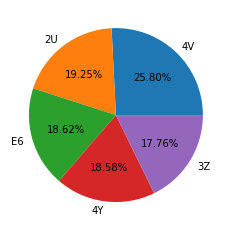

In [19]:
# Pie Chart for Customer Code - Top 5
custmr= df.Customer_Code.value_counts().index
custmr_val = df.Customer_Code.value_counts().values
plt.pie(custmr_val[:5], labels=custmr[:5], autopct='%1.2f%%')

([<matplotlib.patches.Wedge at 0x1e935452250>,
 [Text(0.8804055445847695, 0.6594589275037496, '1338'),
  Text(-0.370578838731442, 1.035698471701323, '3635'),
  Text(-1.0995532183719863, -0.03134836467517058, '3'),
  Text(-0.3176458889795484, -1.053138684701304, '4'),
  Text(0.8948072811534078, -0.6397811575803452, '5')],
 [Text(0.4802212061371469, 0.3597048695474997, '20.46%'),
  Text(-0.20213391203533196, 0.5649264391098124, '20.01%'),
  Text(-0.5997563009301742, -0.0170991080046385, '19.96%'),
  Text(-0.17326139398884455, -0.5744392825643476, '19.81%'),
  Text(0.48807669881094967, -0.34897154049837004, '19.76%')])

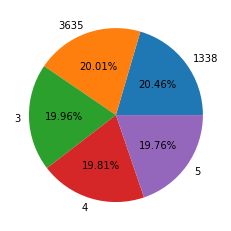

In [20]:
# Pie Chart for Material - Top 5
mat = df.Material.value_counts().index
mat_val = df.Material.value_counts().values
plt.pie(mat_val[:5], labels=mat[:5], autopct='%1.2f%%')

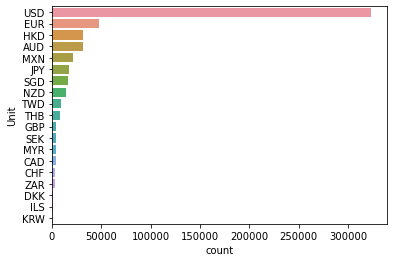

In [21]:
# Count plot for different Units
ax = sns.countplot(y = 'Unit', data = df, order = df['Unit'].value_counts().index)

In [22]:
df.corr()

,Client,Sales_Org_,Distr_Channel,Material,Proc_status,CondRecNo_,Sequential_number_of_the_condition,Condition_scale_quantity,Condition_scale_unit_of_measure,Status,Promotion,Sales_deal,AValD,NoOr,InSc,PrSc,Scale_quantity,Scale_value,Amount,per,NumCCo,CConDe,Lower_limit,Upper_limit,Planned_cond_value,Cumulative_value,Cumulat_accruals_val_,Planned_basis,Accruals,Min_cond_base_value,Max_cond_base_value,Max_condit_value
Client,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sales_Org_,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Distr_Channel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Material,NaN,NaN,NaN,1.000000,-0.218401,-0.065218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.018306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Proc_status,NaN,NaN,NaN,-0.218401,1.000000,-0.017633,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.009435,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CondRecNo_,NaN,NaN,NaN,-0.065218,-0.017633,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.018112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sequential_number_of_the_condition,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Condition_scale_quantity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Condition_scale_unit_of_measure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Status,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

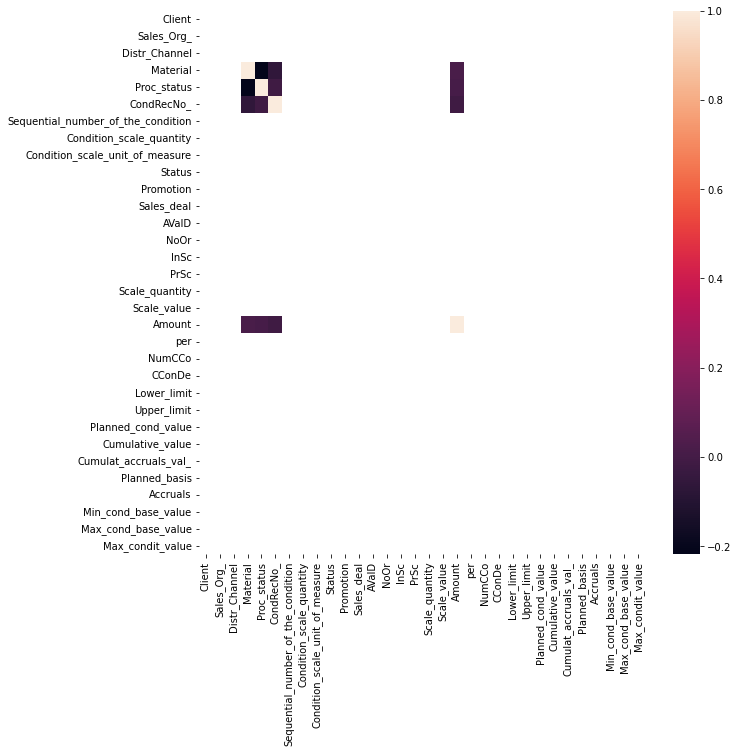

In [23]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr())

In [24]:
df.Valid_From.unique()

array(['25.10.2021', '08.02.2021', '12.07.2021', '15.03.2021',
       '07.09.2021', '29.11.2021', '01.04.2021', '16.11.2021',
       '17.11.2021', '02.12.2021', '27.04.2021', '14.05.2021',
       '13.07.2021', '13.01.2021', '09.04.2021', '10.12.2021',
       '15.08.2021', '01.06.2021', '01.01.2023', '12.02.2021',
       '31.03.2021', '20.04.2021', '11.06.2021', '23.08.2021',
       '05.01.2021', '14.04.2021', '01.01.2024', '28.09.2021',
       '15.09.2021', '13.10.2021', '09.07.2021', '01.02.2021',
       '24.03.2021', '02.12.9999', '03.06.2021', '16.02.2021',
       '09.06.2021', '14.07.2021', '05.01.2022', '22.07.2021',
       '18.03.2021', '11.05.2021', '21.01.2021', '02.06.2021',
       '18.06.2021', '15.11.2021', '30.03.2021', '30.07.2021',
       '28.07.2021', '12.05.2021', '24.06.2021', '19.04.2021',
       '20.07.2021', '07.05.2021', '07.07.2021', '05.08.2021',
       '24.09.2021', '04.08.2021', '27.10.2021', '10.11.2021',
       '01.12.2021', '22.10.2021', '12.10.2021', '29.01

In [25]:
df1=df[['Amount','Material']].groupby(['Material'], as_index=True).mean()
df1.Amount

Material
1         57.940132
2        132.932353
3         97.616869
4        209.809949
5        154.481811
            ...    
10148    320.000000
10149    136.500000
10150     58.500000
10151     84.500000
10152     35.000000
Name: Amount, Length: 10152, dtype: float64

[Text(0.5, 0, 'Number of Materials')]

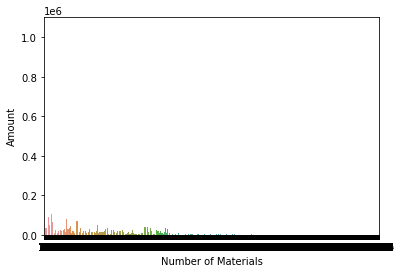

In [26]:
dft=df[['Amount','Material']].groupby(['Material'], as_index=False).sum()
dft.columns
p = sns.barplot(x=dft.Material, y=dft.Amount, data=dft)

p.set(xlabel='Number of Materials')


In [27]:
df.loc[(df.Material==2),['Amount']].mean()

Amount    132.932353
dtype: float64

In [28]:
df.Proc_status.unique()

array([ 5.        , 10.        , 49.85314629, 50.        , 40.        ])

In [29]:
df.loc[(df.Unit==4),['Unit','Material','Amount']].groupby('Material',as_index=False).max()

,Material,Unit,Amount


In [30]:
df.loc[(df.Material==1),['Material','Amount','Unit']]

,Material,Amount,Unit
0,1,9.00,USD
4804,1,20.91,EUR
4805,1,20.91,EUR
6566,1,19.60,EUR
27767,1,18.62,EUR
...,...,...,...
532207,1,20.00,USD
538240,1,18.50,USD
538241,1,18.50,USD
538242,1,18.50,USD


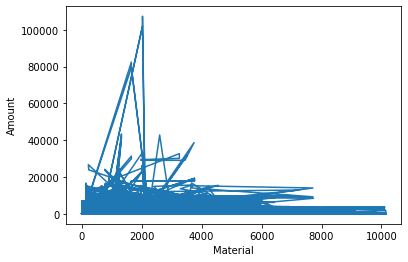

In [31]:
x=df.Material.unique()
y=df.Amount.unique()
plt.plot(df.Material,df.Amount)
plt.xlabel('Material')
plt.ylabel('Amount')
plt.show()

In [32]:
#import statistics
#df.Valid_From=df.replace('30.12.9999','01.08.2022')

In [33]:
#df.loc[(df.Valid_From=='30.12.9999')]

In [34]:
df.Valid_From.unique()

array(['25.10.2021', '08.02.2021', '12.07.2021', '15.03.2021',
       '07.09.2021', '29.11.2021', '01.04.2021', '16.11.2021',
       '17.11.2021', '02.12.2021', '27.04.2021', '14.05.2021',
       '13.07.2021', '13.01.2021', '09.04.2021', '10.12.2021',
       '15.08.2021', '01.06.2021', '01.01.2023', '12.02.2021',
       '31.03.2021', '20.04.2021', '11.06.2021', '23.08.2021',
       '05.01.2021', '14.04.2021', '01.01.2024', '28.09.2021',
       '15.09.2021', '13.10.2021', '09.07.2021', '01.02.2021',
       '24.03.2021', '02.12.9999', '03.06.2021', '16.02.2021',
       '09.06.2021', '14.07.2021', '05.01.2022', '22.07.2021',
       '18.03.2021', '11.05.2021', '21.01.2021', '02.06.2021',
       '18.06.2021', '15.11.2021', '30.03.2021', '30.07.2021',
       '28.07.2021', '12.05.2021', '24.06.2021', '19.04.2021',
       '20.07.2021', '07.05.2021', '07.07.2021', '05.08.2021',
       '24.09.2021', '04.08.2021', '27.10.2021', '10.11.2021',
       '01.12.2021', '22.10.2021', '12.10.2021', '29.01

In [35]:
df.columns

Index(['Client', 'Application', 'Condition_type', 'Sales_Org_',
       'Distr_Channel', 'Customer_Code', 'Material', 'Release_status',
       'Valid_to', 'Valid_From', 'Proc_status', 'CondRecNo_',
       'Sequential_number_of_the_condition', 'Application_2',
       'Condition_type_2', 'Number_of_texts', 'Scale_Type',
       'Scale_basis_indicator', 'Condition_scale_quantity',
       'Condition_scale_unit_of_measure', 'Status', 'Promotion', 'Sales_deal',
       'AValD', 'NoOr', 'InSc', 'PrSc', 'Scale_quantity', 'Scale_value',
       'Amount', 'Unit', 'per', 'UoM_1', 'NumCCo', 'CConDe', 'Lower_limit',
       'Upper_limit', 'Planned_cond_value', 'Cumulative_value',
       'Cumulat_accruals_val_', 'CdCur', 'Planned_basis', 'Accruals',
       'Min_cond_base_value', 'Max_cond_base_value', 'Max_condit_value'],
      dtype='object')

In [36]:
df.loc[(df.Valid_From=='02.12.9999')]

,Client,Application,Condition_type,Sales_Org_,Distr_Channel,Customer_Code,Material,Release_status,Valid_to,Valid_From,Proc_status,CondRecNo_,Sequential_number_of_the_condition,Application_2,Condition_type_2,Number_of_texts,Scale_Type,Scale_basis_indicator,Condition_scale_quantity,Condition_scale_unit_of_measure,Status,Promotion,Sales_deal,AValD,NoOr,InSc,PrSc,Scale_quantity,Scale_value,Amount,Unit,per,UoM_1,NumCCo,CConDe,Lower_limit,Upper_limit,Planned_cond_value,Cumulative_value,Cumulat_accruals_val_,CdCur,Planned_basis,Accruals,Min_cond_base_value,Max_cond_base_value,Max_condit_value
191,1,A,PR,2,3,10,2698,C,31.12.9999,02.12.9999,5.0,2091045304,1,V,ZPR1,A,C,NaN,1,NaN,NaN,NaN,NaN,0,0,0,0,0,0,13.35,USD,1,EA,0,0,0,0,0,0,0,USD,0,0,0,0,0
192,1,A,PR,2,3,10,2697,C,31.12.9999,02.12.9999,5.0,2091045305,1,V,ZPR1,A,C,NaN,1,NaN,NaN,NaN,NaN,0,0,0,0,0,0,48.18,USD,1,EA,0,0,0,0,0,0,0,USD,0,0,0,0,0


In [37]:
x=list(df.Unit.unique())
df.Valid_From.unique()

array(['25.10.2021', '08.02.2021', '12.07.2021', '15.03.2021',
       '07.09.2021', '29.11.2021', '01.04.2021', '16.11.2021',
       '17.11.2021', '02.12.2021', '27.04.2021', '14.05.2021',
       '13.07.2021', '13.01.2021', '09.04.2021', '10.12.2021',
       '15.08.2021', '01.06.2021', '01.01.2023', '12.02.2021',
       '31.03.2021', '20.04.2021', '11.06.2021', '23.08.2021',
       '05.01.2021', '14.04.2021', '01.01.2024', '28.09.2021',
       '15.09.2021', '13.10.2021', '09.07.2021', '01.02.2021',
       '24.03.2021', '02.12.9999', '03.06.2021', '16.02.2021',
       '09.06.2021', '14.07.2021', '05.01.2022', '22.07.2021',
       '18.03.2021', '11.05.2021', '21.01.2021', '02.06.2021',
       '18.06.2021', '15.11.2021', '30.03.2021', '30.07.2021',
       '28.07.2021', '12.05.2021', '24.06.2021', '19.04.2021',
       '20.07.2021', '07.05.2021', '07.07.2021', '05.08.2021',
       '24.09.2021', '04.08.2021', '27.10.2021', '10.11.2021',
       '01.12.2021', '22.10.2021', '12.10.2021', '29.01

In [38]:
pip install forex_python

Note: you may need to restart the kernel to use updated packages.


In [39]:
from forex_python.converter import CurrencyRates
c = CurrencyRates()
#df['Amount_USD'] = df.apply( lambda x: c.convert( x.Unit, 'USD', x.Amount, x.Valid_From), axis = 1)
#df['exchangerate'] = df['USD'] / df['Amount']
df.Unit.unique()
df.loc[(df.Unit=='EUR'),['Valid_From','Amount','Unit']]


,Valid_From,Amount,Unit
177,01.02.2021,23.2,EUR
178,01.02.2021,12.8,EUR
600,01.02.2021,5.5,EUR
601,01.02.2021,11.0,EUR
602,01.02.2021,18.0,EUR
...,...,...,...
470390,01.01.2021,98.1,EUR
470391,01.01.2022,98.1,EUR
470392,01.01.2021,49.2,EUR
470393,01.01.2021,22.8,EUR


In [40]:
from forex_python.converter import CurrencyRates
import datetime

c = CurrencyRates()

dt = datetime.datetime(2020, 3, 27, 11, 21, 13, 114505)

print(c.get_rate('USD', 'INR', dt))


75.49375967932951


In [41]:
dt

datetime.datetime(2020, 3, 27, 11, 21, 13, 114505)

In [42]:
df.columns

Index(['Client', 'Application', 'Condition_type', 'Sales_Org_',
       'Distr_Channel', 'Customer_Code', 'Material', 'Release_status',
       'Valid_to', 'Valid_From', 'Proc_status', 'CondRecNo_',
       'Sequential_number_of_the_condition', 'Application_2',
       'Condition_type_2', 'Number_of_texts', 'Scale_Type',
       'Scale_basis_indicator', 'Condition_scale_quantity',
       'Condition_scale_unit_of_measure', 'Status', 'Promotion', 'Sales_deal',
       'AValD', 'NoOr', 'InSc', 'PrSc', 'Scale_quantity', 'Scale_value',
       'Amount', 'Unit', 'per', 'UoM_1', 'NumCCo', 'CConDe', 'Lower_limit',
       'Upper_limit', 'Planned_cond_value', 'Cumulative_value',
       'Cumulat_accruals_val_', 'CdCur', 'Planned_basis', 'Accruals',
       'Min_cond_base_value', 'Max_cond_base_value', 'Max_condit_value'],
      dtype='object')

In [43]:
df.loc[(df.Valid_From=='30.11.2038'),['Amount','Material','Unit']]

,Amount,Material,Unit
410456,47.0,8267,USD


In [44]:
df.Valid_From.unique()

array(['25.10.2021', '08.02.2021', '12.07.2021', '15.03.2021',
       '07.09.2021', '29.11.2021', '01.04.2021', '16.11.2021',
       '17.11.2021', '02.12.2021', '27.04.2021', '14.05.2021',
       '13.07.2021', '13.01.2021', '09.04.2021', '10.12.2021',
       '15.08.2021', '01.06.2021', '01.01.2023', '12.02.2021',
       '31.03.2021', '20.04.2021', '11.06.2021', '23.08.2021',
       '05.01.2021', '14.04.2021', '01.01.2024', '28.09.2021',
       '15.09.2021', '13.10.2021', '09.07.2021', '01.02.2021',
       '24.03.2021', '02.12.9999', '03.06.2021', '16.02.2021',
       '09.06.2021', '14.07.2021', '05.01.2022', '22.07.2021',
       '18.03.2021', '11.05.2021', '21.01.2021', '02.06.2021',
       '18.06.2021', '15.11.2021', '30.03.2021', '30.07.2021',
       '28.07.2021', '12.05.2021', '24.06.2021', '19.04.2021',
       '20.07.2021', '07.05.2021', '07.07.2021', '05.08.2021',
       '24.09.2021', '04.08.2021', '27.10.2021', '10.11.2021',
       '01.12.2021', '22.10.2021', '12.10.2021', '29.01

In [45]:
df.columns

Index(['Client', 'Application', 'Condition_type', 'Sales_Org_',
       'Distr_Channel', 'Customer_Code', 'Material', 'Release_status',
       'Valid_to', 'Valid_From', 'Proc_status', 'CondRecNo_',
       'Sequential_number_of_the_condition', 'Application_2',
       'Condition_type_2', 'Number_of_texts', 'Scale_Type',
       'Scale_basis_indicator', 'Condition_scale_quantity',
       'Condition_scale_unit_of_measure', 'Status', 'Promotion', 'Sales_deal',
       'AValD', 'NoOr', 'InSc', 'PrSc', 'Scale_quantity', 'Scale_value',
       'Amount', 'Unit', 'per', 'UoM_1', 'NumCCo', 'CConDe', 'Lower_limit',
       'Upper_limit', 'Planned_cond_value', 'Cumulative_value',
       'Cumulat_accruals_val_', 'CdCur', 'Planned_basis', 'Accruals',
       'Min_cond_base_value', 'Max_cond_base_value', 'Max_condit_value'],
      dtype='object')

In [46]:
df.drop(df[(df['Valid_From'].str[-4:]=='9999')].index,inplace=True)

In [47]:
df.shape

(541514, 46)

In [48]:
df.Valid_From.str[-4:].unique()

array(['2021', '2023', '2024', '2022', '2100', '2202', '2038'],
      dtype=object)

In [49]:
df.drop(df[(df['Valid_From'].str[-4:]=='2038')].index,inplace=True)

In [50]:
df.drop(df[(df['Valid_From'].str[-4:]=='2100')].index,inplace=True)

In [51]:
df.shape

(541508, 46)

In [52]:
df.Valid_From.str[-4:].unique()

array(['2021', '2023', '2024', '2022', '2202'], dtype=object)

In [53]:
df.drop(df[(df['Valid_From'].str[-4:]=='2202')].index,inplace=True)

In [54]:
df.shape

(541507, 46)

In [55]:
df.Valid_From.str[-4:].unique()

array(['2021', '2023', '2024', '2022'], dtype=object)

In [56]:
df.columns

Index(['Client', 'Application', 'Condition_type', 'Sales_Org_',
       'Distr_Channel', 'Customer_Code', 'Material', 'Release_status',
       'Valid_to', 'Valid_From', 'Proc_status', 'CondRecNo_',
       'Sequential_number_of_the_condition', 'Application_2',
       'Condition_type_2', 'Number_of_texts', 'Scale_Type',
       'Scale_basis_indicator', 'Condition_scale_quantity',
       'Condition_scale_unit_of_measure', 'Status', 'Promotion', 'Sales_deal',
       'AValD', 'NoOr', 'InSc', 'PrSc', 'Scale_quantity', 'Scale_value',
       'Amount', 'Unit', 'per', 'UoM_1', 'NumCCo', 'CConDe', 'Lower_limit',
       'Upper_limit', 'Planned_cond_value', 'Cumulative_value',
       'Cumulat_accruals_val_', 'CdCur', 'Planned_basis', 'Accruals',
       'Min_cond_base_value', 'Max_cond_base_value', 'Max_condit_value'],
      dtype='object')

In [57]:
df['Valid_From']=pd.to_datetime(df['Valid_From'])
#df['Valid_to']=pd.to_datetime(df['Valid_to'])


C:\Users\STSC\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '25.10.2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\STSC\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15.03.2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\STSC\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '29.11.2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\STSC\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '16.11.2021' in DD/MM/YYYY format. Provide format or specify in

In [58]:
dct={'USD':1.00,'EUR':1.01, 'CHF':1.02, 'GBP':1.19, 'SGD':0.71, 'THB':0.028 , 'SEK':0.095, 'JPY':0.0073, 'NZD':0.62,
       'KRW':0.00077 , 'DKK': 0.14 , 'ILS' : 0.29, 'HKD': 0.13, 'AUD': 0.68, 'TWD':0.034, 'ZAR': 0.059, 'MYR': 0.23, 'MXN': 0.048,
       'CAD':0.77}

In [59]:
df.columns

Index(['Client', 'Application', 'Condition_type', 'Sales_Org_',
       'Distr_Channel', 'Customer_Code', 'Material', 'Release_status',
       'Valid_to', 'Valid_From', 'Proc_status', 'CondRecNo_',
       'Sequential_number_of_the_condition', 'Application_2',
       'Condition_type_2', 'Number_of_texts', 'Scale_Type',
       'Scale_basis_indicator', 'Condition_scale_quantity',
       'Condition_scale_unit_of_measure', 'Status', 'Promotion', 'Sales_deal',
       'AValD', 'NoOr', 'InSc', 'PrSc', 'Scale_quantity', 'Scale_value',
       'Amount', 'Unit', 'per', 'UoM_1', 'NumCCo', 'CConDe', 'Lower_limit',
       'Upper_limit', 'Planned_cond_value', 'Cumulative_value',
       'Cumulat_accruals_val_', 'CdCur', 'Planned_basis', 'Accruals',
       'Min_cond_base_value', 'Max_cond_base_value', 'Max_condit_value'],
      dtype='object')

In [60]:
df.Valid_From

0        2021-10-25
1        2021-08-02
2        2021-08-02
3        2021-12-07
4        2021-12-07
            ...    
545675   2021-01-02
545676   2021-01-08
545677   2022-01-02
545678   2021-01-15
545679   2021-01-02
Name: Valid_From, Length: 541507, dtype: datetime64[ns]

In [61]:
l= ['Customer Code', 'Material','Proc_status', 'Amount', 'Unit', 'Valid_to', 'Valid_From'] 
for i in df.columns:
    if i not in l:
        del df[i]
df.columns

Index(['Material', 'Valid_to', 'Valid_From', 'Proc_status', 'Amount', 'Unit'], dtype='object')

In [62]:
df['exchange_rate']=df['Unit'].map(dct)

In [63]:
df['Uniform_Amount']=df['Amount']*df['exchange_rate']

In [64]:
df.columns

Index(['Material', 'Valid_to', 'Valid_From', 'Proc_status', 'Amount', 'Unit',
       'exchange_rate', 'Uniform_Amount'],
      dtype='object')

In [65]:
df.loc[(df.Unit=='CHF'),['Amount','Uniform_Amount']]

,Amount,Uniform_Amount
1758,29.0,29.58
1759,29.0,29.58
1760,36.0,36.72
1761,36.0,36.72
1762,25.0,25.50
...,...,...
4773,33.0,33.66
4774,29.0,29.58
4775,29.0,29.58
4776,68.0,69.36


<AxesSubplot:>

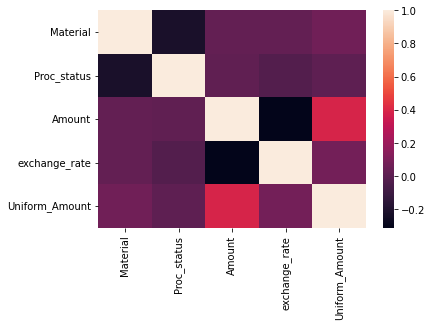

In [66]:
sns.heatmap(df.corr())

In [67]:
df.corr()

,Material,Proc_status,Amount,exchange_rate,Uniform_Amount
Material,1.000000,-0.223658,0.021343,0.021085,0.064379
Proc_status,-0.223658,1.000000,0.009488,-0.031540,0.005556
Amount,0.021343,0.009488,1.000000,-0.314042,0.387364
exchange_rate,0.021085,-0.031540,-0.314042,1.000000,0.075635
Uniform_Amount,0.064379,0.005556,0.387364,0.075635,1.000000


In [68]:
df.shape

(541507, 8)

In [69]:
df.columns

Index(['Material', 'Valid_to', 'Valid_From', 'Proc_status', 'Amount', 'Unit',
       'exchange_rate', 'Uniform_Amount'],
      dtype='object')

In [70]:
df.drop(df[(df.Amount==0)].index,inplace=True)

In [71]:
df.shape

(541313, 8)

In [72]:
df.Valid_to.str[-4:].unique()

array(['9999', '2021', '2022', '2023', '2024', '2025'], dtype=object)

In [73]:
df.Valid_From.dtypes

dtype('<M8[ns]')

In [74]:
df.loc[(df['Valid_From']>pd.Timestamp(2021,1,1)) & (df['Valid_From']<pd.Timestamp(2021,12,31)),['Material','Uniform_Amount']].groupby('Material').sum()

,Uniform_Amount
Material,
1,1731.7482
2,1311.4481
3,7645.2432
4,15414.5004
5,11661.7718
...,...
10148,41.6000
10149,136.5000
10150,58.5000


In [75]:
df.loc[(df['Valid_From']>pd.Timestamp(2022,1,1)) & (df['Valid_From']<pd.Timestamp(2022,12,31)),['Material','Uniform_Amount']].groupby('Material').sum()

,Uniform_Amount
Material,
1,1213.09275
3,3036.98470
4,6736.31830
5,5180.99895
6,17075.54330
...,...
9841,85.50000
9842,15.00000
9852,45.00000


In [76]:
df.loc[(df['Valid_From']>pd.Timestamp(2023,1,1)) & (df['Valid_From']<pd.Timestamp(2023,12,31)),['Material','Uniform_Amount']].groupby('Material').sum()

,Uniform_Amount
Material,
1127,144.0
1636,102.5
2150,180.0
2151,189.0
2152,189.0
...,...
3529,65.0
3628,76.5
3634,151.0


In [77]:
df.loc[(df['Valid_From']>pd.Timestamp(2024,1,1)) & (df['Valid_From']<pd.Timestamp(2024,12,31)),['Material','Uniform_Amount']].groupby('Material').sum()

,Uniform_Amount
Material,
998,500.0


In [78]:
df.isnull().sum()

Material          0
Valid_to          0
Valid_From        0
Proc_status       0
Amount            0
Unit              0
exchange_rate     0
Uniform_Amount    0
dtype: int64

In [79]:
df.columns

Index(['Material', 'Valid_to', 'Valid_From', 'Proc_status', 'Amount', 'Unit',
       'exchange_rate', 'Uniform_Amount'],
      dtype='object')

In [80]:
#df.loc[:,['Material','Unit','Uniform_Amount']].groupby('Material').sum()

In [81]:
#df['Unit'].dtypes

In [82]:
df.shape

(541313, 8)

In [83]:
df.Valid_From

0        2021-10-25
1        2021-08-02
2        2021-08-02
3        2021-12-07
4        2021-12-07
            ...    
545675   2021-01-02
545676   2021-01-08
545677   2022-01-02
545678   2021-01-15
545679   2021-01-02
Name: Valid_From, Length: 541313, dtype: datetime64[ns]

In [84]:
df.loc[(df['Valid_From']>pd.Timestamp(2021,1,1)) & (df['Valid_From']<pd.Timestamp(2021,12,31)),['Material','Uniform_Amount']].groupby(['Material',df['Valid_From'].dt.to_period('Q')])['Uniform_Amount'].sum()

Material  Valid_From
1         2021Q1        858.2842
          2021Q3        381.8690
          2021Q4        491.5950
2         2021Q1        534.6412
          2021Q3        219.8396
                          ...   
10148     2021Q1         41.6000
10149     2021Q1        136.5000
10150     2021Q1         58.5000
10151     2021Q1         84.5000
10152     2021Q2         35.0000
Name: Uniform_Amount, Length: 19446, dtype: float64

TypeError: 'method' object is not subscriptable

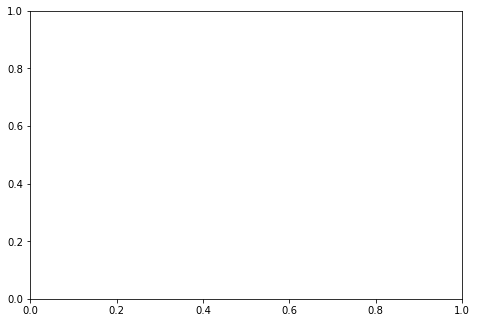

In [85]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(df.Valid_From.dt.to_period('Q'),df.loc[(df['Valid_From']>pd.Timestamp(2021,1,1)) & (df['Valid_From']<pd.Timestamp(2021,12,31)),(df.Material==df.Material.value_counts[:5]),['Material','Uniform_Amount']].groupby(['Material',df['Valid_From'].dt.to_period('Q')])['Uniform_Amount'].sum())

In [86]:
x=pd.DataFrame(df.loc[:,['Material','Valid_From','Uniform_Amount']])
x

,Material,Valid_From,Uniform_Amount
0,1,2021-10-25,9.00
1,2,2021-08-02,27.40
2,3232,2021-08-02,28.74
3,5263,2021-12-07,10.04
4,5855,2021-12-07,10.00
...,...,...,...
545675,231,2021-01-02,79.00
545676,231,2021-01-08,83.00
545677,231,2022-01-02,83.00
545678,232,2021-01-15,79.00


In [88]:
x['Quarters']=x.Valid_From.dt.to_period('Q')

In [89]:
x.columns

Index(['Material', 'Valid_From', 'Uniform_Amount', 'Quarters'], dtype='object')

In [90]:
x.sort_values(by='Valid_From',inplace=True)
x


x.Quarters=x.Quarters.astype('string')
x.dtypes

Material                   int64
Valid_From        datetime64[ns]
Uniform_Amount           float64
Quarters                  string
dtype: object

In [91]:
x

,Material,Valid_From,Uniform_Amount,Quarters
206263,720,2021-01-01,33.50,2021Q1
142346,490,2021-01-01,22.50,2021Q1
142345,490,2021-01-01,22.50,2021Q1
142338,489,2021-01-01,22.50,2021Q1
142337,489,2021-01-01,22.50,2021Q1
...,...,...,...,...
112,6769,2024-01-01,111.00,2024Q1
115,6801,2024-01-01,167.00,2024Q1
118,6788,2024-01-01,211.95,2024Q1
121,6790,2024-01-01,227.12,2024Q1


<AxesSubplot:xlabel='Quarters', ylabel='Uniform_Amount'>

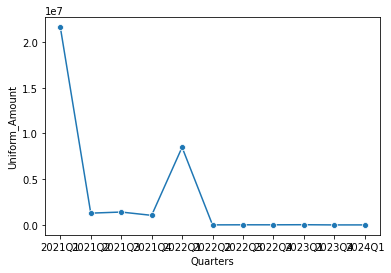

In [92]:
sns.lineplot(data=x,x='Quarters',y='Uniform_Amount',marker='o',estimator=sum,ci=None)

In [93]:
x.Quarters.unique()

<StringArray>
['2021Q1', '2021Q2', '2021Q3', '2021Q4', '2022Q1', '2022Q2', '2022Q3',
 '2022Q4', '2023Q1', '2023Q4', '2024Q1']
Length: 11, dtype: string

In [94]:
x.Uniform_Amount.dtypes

dtype('float64')

In [95]:
x.Valid_From

206263   2021-01-01
142346   2021-01-01
142345   2021-01-01
142338   2021-01-01
142337   2021-01-01
            ...    
112      2024-01-01
115      2024-01-01
118      2024-01-01
121      2024-01-01
532379   2024-01-03
Name: Valid_From, Length: 541313, dtype: datetime64[ns]

In [96]:
df.Material.value_counts()[:5]

1338    404
3635    397
3       396
4       393
6       391
Name: Material, dtype: int64

In [ ]:
df.loc[(df.Material==x.index) & (df['Valid_From']>pd.Timestamp(2021,1,1)) & (df['Valid_From']<pd.Timestamp(2021,12,31)),['Material','Uniform_Amount','Valid_From']].groupby(['Material',df['Valid_From'].dt.to_period('Q')]).Uniform_Amount.sum()

In [ ]:
for df.Material in x.index:
    print(df.loc[(df['Valid_From']>pd.Timestamp(2021,1,1)) & (df['Valid_From']<pd.Timestamp(2021,12,31)),['Material','Uniform_Amount']].groupby(['Material',df['Valid_From'].dt.to_period('Q')])['Uniform_Amount'].sum())

In [ ]:
df.loc[(df['Valid_From']>pd.Timestamp(2021,1,1)) & (df['Valid_From']<pd.Timestamp(2021,12,31)),['Material','Uniform_Amount']].groupby(['Material',df['Valid_From'].dt.to_period('Q')])['Uniform_Amount'].sum()

In [ ]:
l=[]
for i,j in enumerate(x):
    l.append(i)
    print(j)
    
    


In [97]:
np.sort(df['Valid_From'].dt.to_period('Q').unique())

array([Period('2021Q1', 'Q-DEC'), Period('2021Q2', 'Q-DEC'),
       Period('2021Q3', 'Q-DEC'), Period('2021Q4', 'Q-DEC'),
       Period('2022Q1', 'Q-DEC'), Period('2022Q2', 'Q-DEC'),
       Period('2022Q3', 'Q-DEC'), Period('2022Q4', 'Q-DEC'),
       Period('2023Q1', 'Q-DEC'), Period('2023Q4', 'Q-DEC'),
       Period('2024Q1', 'Q-DEC')], dtype=object)

In [98]:
#df.sort_values()

In [99]:
df.Material.unique()

array([    1,     2,  3232, ...,  7038,  8579, 10152], dtype=int64)

# ML Model

In [100]:
df.Proc_status.unique()

array([ 5.        , 10.        , 49.85314629, 50.        , 40.        ])

In [101]:
df.dtypes


Material                   int64
Valid_to                  object
Valid_From        datetime64[ns]
Proc_status              float64
Amount                   float64
Unit                      object
exchange_rate            float64
Uniform_Amount           float64
dtype: object

In [102]:
#df=pd.get_dummies(df,drop_first=True)

In [103]:
df['Valid_From'] = pd.to_datetime(df['Valid_From']).dt.strftime('%d%m%Y')


In [104]:
df['Valid_to'] = df['Valid_to'].str.replace(r'[^\w\s]+', '')

C:\Users\STSC\AppData\Local\Temp\ipykernel_19372\1141257516.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Valid_to'] = df['Valid_to'].str.replace(r'[^\w\s]+', '')


In [105]:
df.Valid_to.dtypes

dtype('O')

In [106]:
df['Valid_From'] = df['Valid_From'].astype(int)

In [107]:
df.Valid_to=df.Valid_to.astype(int)

In [108]:
le = LabelEncoder()
x = list(df.columns)
for i, j in enumerate(x):
    if df[j].dtypes == 'object':
        le.fit(df[j].drop_duplicates())
        df[j] = le.transform(df[j])
#le = LabelEncoder()
#le.fit(df.Proc_status.drop_duplicates())
#df.Proc_status = le.transform(df.Proc_status)
#le.fit(df.Unit.drop_duplicates())
#df.Unit=le.transform(df.Unit)

In [109]:





df.dtypes

Material            int64
Valid_to            int32
Valid_From          int32
Proc_status       float64
Amount            float64
Unit                int32
exchange_rate     float64
Uniform_Amount    float64
dtype: object

In [110]:
df.corr()

,Material,Valid_to,Valid_From,Proc_status,Amount,Unit,exchange_rate,Uniform_Amount
Material,1.000000,-0.212313,0.105282,-0.223417,0.021413,-0.031102,0.020940,0.064564
Valid_to,-0.212313,1.000000,-0.102479,0.019657,0.006617,-0.015944,-0.061942,0.006491
Valid_From,0.105282,-0.102479,1.000000,-0.079706,-0.014123,0.025804,0.094150,0.013865
Proc_status,-0.223417,0.019657,-0.079706,1.000000,0.009466,-0.037408,-0.031505,0.005470
Amount,0.021413,0.006617,-0.014123,0.009466,1.000000,-0.054798,-0.314014,0.387339
Unit,-0.031102,-0.015944,0.025804,-0.037408,-0.054798,1.000000,0.381983,0.037813
exchange_rate,0.020940,-0.061942,0.094150,-0.031505,-0.314014,0.381983,1.000000,0.075777
Uniform_Amount,0.064564,0.006491,0.013865,0.005470,0.387339,0.037813,0.075777,1.000000


In [111]:
df.loc[:,['Material','Unit','Uniform_Amount']].groupby('Material').sum().Unit

Material
1        1977
2         388
3        4991
4        4882
5        4926
         ... 
10148       6
10149      17
10150      17
10151      17
10152      17
Name: Unit, Length: 9896, dtype: int32

In [112]:
df.loc[:,['Material','Uniform_Amount']].groupby('Material').sum()

,Uniform_Amount
Material,
1,2944.84095
2,1311.44810
3,13021.05470
4,26779.28460
5,19028.91895
...,...
10148,41.60000
10149,136.50000
10150,58.50000


In [113]:
df.loc[:,['Material','Unit']].groupby('Material')['Unit'].sum()

Material
1        1977
2         388
3        4991
4        4882
5        4926
         ... 
10148       6
10149      17
10150      17
10151      17
10152      17
Name: Unit, Length: 9896, dtype: int32

In [114]:
r=(df.loc[:,['Material','Unit']].groupby('Material')['Unit'].sum())*(df.loc[:,['Material','Uniform_Amount']].groupby('Material')['Uniform_Amount'].sum()/df.loc[:,['Material','Unit']].groupby('Material')['Unit'].sum())

In [115]:
df['total_sales']=r

In [116]:
df[(df.total_sales.isnull()==True)]

,Material,Valid_to,Valid_From,Proc_status,Amount,Unit,exchange_rate,Uniform_Amount,total_sales
0,1,31129999,25102021,5.0,9.00,17,1.00,9.0000,NaN
4687,147,31129999,30072021,50.0,146.00,2,1.02,148.9200,NaN
4888,1563,31129999,5012022,50.0,22.52,4,1.01,22.7452,NaN
4891,1583,31129999,5012022,50.0,37.64,4,1.01,38.0164,NaN
4929,1246,31129999,5012022,50.0,42.36,4,1.01,42.7836,NaN
...,...,...,...,...,...,...,...,...,...
545675,231,31072021,2012021,50.0,79.00,17,1.00,79.0000,NaN
545676,231,31012022,8012021,50.0,83.00,17,1.00,83.0000,NaN
545677,231,31012024,2012022,50.0,83.00,17,1.00,83.0000,NaN
545678,232,31012021,15012021,50.0,79.00,17,1.00,79.0000,NaN


In [117]:
df.drop(columns=['total_sales'],inplace=True)

In [118]:
df.columns

Index(['Material', 'Valid_to', 'Valid_From', 'Proc_status', 'Amount', 'Unit',
       'exchange_rate', 'Uniform_Amount'],
      dtype='object')

In [119]:
df.loc[:,['Material','Unit','Uniform_Amount']].groupby('Material').sum()

,Unit,Uniform_Amount
Material,,
1,1977,2944.84095
2,388,1311.44810
3,4991,13021.05470
4,4882,26779.28460
5,4926,19028.91895
...,...,...
10148,6,41.60000
10149,17,136.50000
10150,17,58.50000


In [120]:
df['Total_Sales']=df.loc[:,['Material','Uniform_Amount']].groupby('Material').transform('sum')

In [121]:
df.loc[:,['Material','Unit','Uniform_Amount']].groupby('Material').sum()

,Unit,Uniform_Amount
Material,,
1,1977,2944.84095
2,388,1311.44810
3,4991,13021.05470
4,4882,26779.28460
5,4926,19028.91895
...,...,...
10148,6,41.60000
10149,17,136.50000
10150,17,58.50000


In [122]:
df.loc[(df.Unit==11),['Amount','Uniform_Amount']]

,Amount,Uniform_Amount
307161,140.0,32.20
307162,142.0,32.66
307163,195.0,44.85
307164,215.0,49.45
307165,218.0,50.14
...,...,...
524282,560.0,128.80
524283,560.0,128.80
524284,155.0,35.65
524285,155.0,35.65


In [123]:
df.columns

Index(['Material', 'Valid_to', 'Valid_From', 'Proc_status', 'Amount', 'Unit',
       'exchange_rate', 'Uniform_Amount', 'Total_Sales'],
      dtype='object')

In [124]:
df.loc[(df.Material==1),['Material','Unit','Total_Sales','Uniform_Amount','Valid_From']]

,Material,Unit,Total_Sales,Uniform_Amount,Valid_From
0,1,17,2944.84095,9.0000,25102021
4804,1,4,2944.84095,21.1191,11012021
4805,1,4,2944.84095,21.1191,5012022
6566,1,4,2944.84095,19.7960,11012021
27767,1,4,2944.84095,18.8062,11012021
...,...,...,...,...,...
532207,1,17,2944.84095,20.0000,3012022
538240,1,17,2944.84095,18.5000,21102021
538241,1,17,2944.84095,18.5000,11092021
538242,1,17,2944.84095,18.5000,2012022


In [125]:
df.columns

Index(['Material', 'Valid_to', 'Valid_From', 'Proc_status', 'Amount', 'Unit',
       'exchange_rate', 'Uniform_Amount', 'Total_Sales'],
      dtype='object')

In [126]:
df.loc[:,['Material','Unit','Uniform_Amount']].groupby('Material').sum()

,Unit,Uniform_Amount
Material,,
1,1977,2944.84095
2,388,1311.44810
3,4991,13021.05470
4,4882,26779.28460
5,4926,19028.91895
...,...,...
10148,6,41.60000
10149,17,136.50000
10150,17,58.50000


In [127]:
df.loc[:,['Material','Uniform_Amount']]

,Material,Uniform_Amount
0,1,9.00
1,2,27.40
2,3232,28.74
3,5263,10.04
4,5855,10.00
...,...,...
545675,231,79.00
545676,231,83.00
545677,231,83.00
545678,232,79.00


In [128]:
df.shape

(541313, 9)

In [129]:
df.shape

(541313, 9)

In [130]:
df.isna().sum()

Material          0
Valid_to          0
Valid_From        0
Proc_status       0
Amount            0
Unit              0
exchange_rate     0
Uniform_Amount    0
Total_Sales       0
dtype: int64

In [131]:
df.head(5)

,Material,Valid_to,Valid_From,Proc_status,Amount,Unit,exchange_rate,Uniform_Amount,Total_Sales
0,1,31129999,25102021,5.0,9.00,17,1.0,9.00,2944.84095
1,2,31129999,2082021,5.0,27.40,17,1.0,27.40,1311.44810
2,3232,31129999,2082021,5.0,28.74,17,1.0,28.74,2832.41160
3,5263,31129999,7122021,5.0,10.04,17,1.0,10.04,237.54000
4,5855,31129999,7122021,5.0,10.00,17,1.0,10.00,121.85000


In [132]:
#df.drop(columns=['unit_price'],inplace=True)

In [133]:
X=df.drop(columns=['Total_Sales','Amount'])

In [134]:
y=df['Total_Sales']

In [135]:
df.isna().sum()

Material          0
Valid_to          0
Valid_From        0
Proc_status       0
Amount            0
Unit              0
exchange_rate     0
Uniform_Amount    0
Total_Sales       0
dtype: int64

In [136]:
df.dtypes

Material            int64
Valid_to            int32
Valid_From          int32
Proc_status       float64
Amount            float64
Unit                int32
exchange_rate     float64
Uniform_Amount    float64
Total_Sales       float64
dtype: object

<AxesSubplot:>

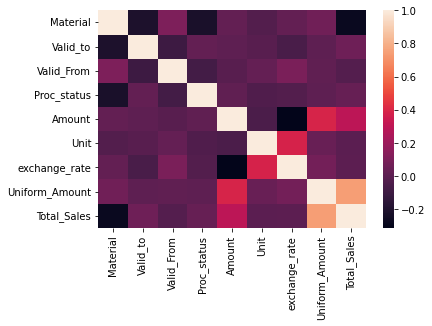

In [137]:
sns.heatmap(df.corr())

In [138]:
X=df.drop(columns=['Valid_to','Valid_From','Uniform_Amount'])
y=df['Uniform_Amount']

In [139]:
X

,Material,Proc_status,Amount,Unit,exchange_rate,Total_Sales
0,1,5.0,9.00,17,1.0,2944.84095
1,2,5.0,27.40,17,1.0,1311.44810
2,3232,5.0,28.74,17,1.0,2832.41160
3,5263,5.0,10.04,17,1.0,237.54000
4,5855,5.0,10.00,17,1.0,121.85000
...,...,...,...,...,...,...
545675,231,50.0,79.00,17,1.0,25296.32940
545676,231,50.0,83.00,17,1.0,25296.32940
545677,231,50.0,83.00,17,1.0,25296.32940
545678,232,50.0,79.00,17,1.0,25243.02940


In [140]:
train_X,valid_X,train_y,valid_y=train_test_split(X,y,test_size=0.3,random_state=1)

In [141]:
# Create multiple linear regression model using X and y
# and LinearRegression() function from sklearn (skikit-learn) 
# library.
df_lm=LinearRegression()
df_lm.fit(train_X,train_y)


LinearRegression()

In [142]:
print('Regression Model for boston Housing training set')
print()
print('Intercept: ', np.round(df_lm.intercept_, 2))
print(pd.DataFrame({'Predictor': X.columns, 'Coefficient': np.round(df_lm.coef_, 2)}))

Regression Model for boston Housing training set

Intercept:  -144.12
       Predictor  Coefficient
0       Material         0.02
1    Proc_status         1.90
2         Amount         0.03
3           Unit         0.23
4  exchange_rate        33.56
5    Total_Sales         0.00


In [143]:
df_lm_pred=df_lm.predict(valid_X)
# Develop and display data frame with actual values of Price,
# scoring (predicted) results, and residuals.
# Use round() function to round vlaues in data frame to 
# 2 decimals. 
print('Actual, Prediction, and Residual Prices for Validation Set')
result = round(pd.DataFrame({'Actual': valid_y,'Predicted': df_lm_pred, 
                       'Residual': valid_y - df_lm_pred}), 2)
print(result.head(10))


Actual, Prediction, and Residual Prices for Validation Set
        Actual  Predicted  Residual
95233   104.65      68.75     35.90
381448  310.00     241.90     68.10
295280  197.78     158.17     39.61
524466   35.50      40.88     -5.38
36484    48.50      66.69    -18.19
374139   35.00      38.45     -3.45
302041   68.00      59.86      8.14
520298   39.65      13.54     26.11
34971    48.00      45.74      2.26
392778  310.00     367.73    -57.73


In [144]:
from sklearn.metrics import r2_score,mean_squared_error

In [145]:
r_squared=r2_score(valid_y,df_lm_pred)
mse=mean_squared_error(valid_y,df_lm_pred)

In [146]:
print("r_squared is {}".format(r_squared))
print("mean_squared_error is",mse)

r_squared is 0.6658684441749736
mean_squared_error is 2964.0885696422324


Text(0, 0.5, 'predicted y')

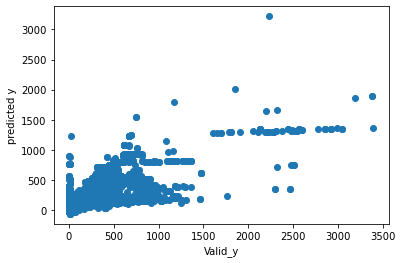

In [147]:
import matplotlib.pyplot as plt
plt.scatter(valid_y,df_lm_pred)
plt.xlabel("Valid_y")
plt.ylabel("predicted y")


In [148]:
from dmba import regressionSummary
regressionSummary(valid_y,df_lm_pred)


Regression statistics

                      Mean Error (ME) : -0.3816
       Root Mean Squared Error (RMSE) : 54.4434
            Mean Absolute Error (MAE) : 22.8558
          Mean Percentage Error (MPE) : -102.2358
Mean Absolute Percentage Error (MAPE) : 329.2003


In [149]:
df.corr()

,Material,Valid_to,Valid_From,Proc_status,Amount,Unit,exchange_rate,Uniform_Amount,Total_Sales
Material,1.000000,-0.212313,0.105282,-0.223417,0.021413,-0.031102,0.020940,0.064564,-0.282350
Valid_to,-0.212313,1.000000,-0.102479,0.019657,0.006617,-0.015944,-0.061942,0.006491,0.056016
Valid_From,0.105282,-0.102479,1.000000,-0.079706,-0.014123,0.025804,0.094150,0.013865,-0.026333
Proc_status,-0.223417,0.019657,-0.079706,1.000000,0.009466,-0.037408,-0.031505,0.005470,0.029985
Amount,0.021413,0.006617,-0.014123,0.009466,1.000000,-0.054798,-0.314014,0.387339,0.294314
Unit,-0.031102,-0.015944,0.025804,-0.037408,-0.054798,1.000000,0.381983,0.037813,-0.002420
exchange_rate,0.020940,-0.061942,0.094150,-0.031505,-0.314014,0.381983,1.000000,0.075777,0.001515
Uniform_Amount,0.064564,0.006491,0.013865,0.005470,0.387339,0.037813,0.075777,1.000000,0.740238
Total_Sales,-0.282350,0.056016,-0.026333,0.029985,0.294314,-0.002420,0.001515,0.740238,1.000000


In [150]:
from dmba import adjusted_r2_score
adj_r2 = round(adjusted_r2_score(valid_y, df_lm_pred,df_lm),3)

In [151]:
adj_r2

0.666

In [152]:
from sklearn.metrics import mean_squared_log_error
mean_squared_log_error(valid_y, df_lm_pred)

ValueError: Mean Squared Logarithmic Error cannot be used when targets contain negative values.

In [153]:
from sklearn.tree import DecisionTreeRegressor

In [154]:
dt=DecisionTreeRegressor(max_depth=4,min_samples_leaf=0.1,random_state=0)

In [155]:
dt.fit(train_X,train_y)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.1, random_state=0)

In [156]:
pred=dt.predict(valid_X)

In [157]:
from dmba import plotDecisionTree,regressionSummary

In [158]:
regressionSummary(valid_y,pred)


Regression statistics

                      Mean Error (ME) : -0.5350
       Root Mean Squared Error (RMSE) : 74.1367
            Mean Absolute Error (MAE) : 25.6974
          Mean Percentage Error (MPE) : -466.9256
Mean Absolute Percentage Error (MAPE) : 485.7647


In [159]:
r2_score(valid_y,pred)

0.38042570262080333

In [160]:
regressionSummary(valid_y,pred)


Regression statistics

                      Mean Error (ME) : -0.5350
       Root Mean Squared Error (RMSE) : 74.1367
            Mean Absolute Error (MAE) : 25.6974
          Mean Percentage Error (MPE) : -466.9256
Mean Absolute Percentage Error (MAPE) : 485.7647


In [161]:
mean_squared_log_error(valid_y,pred)

0.63904138648713

In [212]:
df['Uniform_Amount']

0          9.00
1         27.40
2         28.74
3         10.04
4         10.00
          ...  
545675    79.00
545676    83.00
545677    83.00
545678    79.00
545679    79.00
Name: Uniform_Amount, Length: 541313, dtype: float64

In [213]:
X

,Material,Proc_status,Amount,Unit,exchange_rate,Total_Sales
0,1,5.0,9.00,17,1.0,2944.84095
1,2,5.0,27.40,17,1.0,1311.44810
2,3232,5.0,28.74,17,1.0,2832.41160
3,5263,5.0,10.04,17,1.0,237.54000
4,5855,5.0,10.00,17,1.0,121.85000
...,...,...,...,...,...,...
545675,231,50.0,79.00,17,1.0,25296.32940
545676,231,50.0,83.00,17,1.0,25296.32940
545677,231,50.0,83.00,17,1.0,25296.32940
545678,232,50.0,79.00,17,1.0,25243.02940


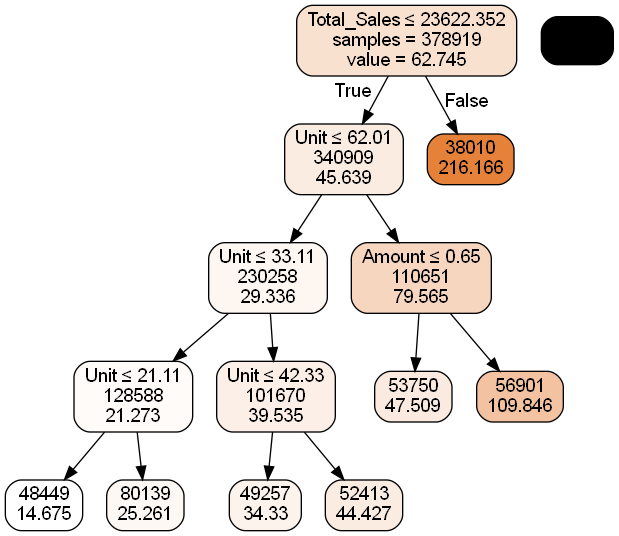

In [214]:
plotDecisionTree(dt,feature_names=['Material','Proc_status','Unit',
      'exchange_rate','Amount','Total_Sales'])

In [172]:
from sklearn.model_selection import cross_val_score
cross_val_score(dt, valid_X, valid_y)

array([0.41374041, 0.34988416, 0.41510068, 0.35530451, 0.39006332])

In [173]:
pred

array([ 47.50927613, 216.16565551, 216.16565551, ...,  44.42710802,
       109.84575543, 109.84575543])

    ###RANDOM FOREST REGRESSOR###

In [174]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 10, random_state = 0)
rfr.fit(valid_X,valid_y)

RandomForestRegressor(n_estimators=10, random_state=0)

In [175]:
pred_y=rfr.predict(valid_X)

In [176]:
r2_score(valid_y,pred_y)

0.999129031013956

In [177]:
from sklearn.metrics import mean_squared_log_error
mean_squared_log_error(valid_y,pred_y)

0.00032737062266525595

In [178]:
from dmba import regressionSummary

In [179]:
regressionSummary(valid_y,pred_y)


Regression statistics

                      Mean Error (ME) : 0.0031
       Root Mean Squared Error (RMSE) : 2.7796
            Mean Absolute Error (MAE) : 0.0886
          Mean Percentage Error (MPE) : -0.0693
Mean Absolute Percentage Error (MAPE) : 0.1023


In [180]:
import math
round(math.sqrt(mean_squared_error(valid_y,pred_y)),4)
#adjusted_r2 = round(adjusted_r2_score(valid_y, pred_y,rfr),3)

2.7796

In [181]:
rfr.score(valid_X,valid_y)

0.999129031013956

In [182]:
rfr.score(train_X,train_y)

0.9913798409991166

In [183]:
dt.score(valid_X,valid_y)

0.38042570262080333

In [184]:
dt.score(train_X,train_y)  

0.35970738247937706

In [185]:
np.arange(1,10,2)

array([1, 3, 5, 7, 9])

In [186]:
df.columns

Index(['Material', 'Valid_to', 'Valid_From', 'Proc_status', 'Amount', 'Unit',
       'exchange_rate', 'Uniform_Amount', 'Total_Sales'],
      dtype='object')

In [187]:
df.columns

Index(['Material', 'Valid_to', 'Valid_From', 'Proc_status', 'Amount', 'Unit',
       'exchange_rate', 'Uniform_Amount', 'Total_Sales'],
      dtype='object')

In [188]:
 from sklearn.model_selection import cross_val_score

In [189]:
100*cross_val_score(rfr,train_X,train_y)

array([99.87269903, 99.76871477, 99.07750445, 98.07966152, 99.90315446])

In [190]:
cross_val_score(dt,train_X,train_y)

array([0.36232129, 0.36364226, 0.36820629, 0.34522051, 0.35786842])

In [191]:
df.columns

Index(['Material', 'Valid_to', 'Valid_From', 'Proc_status', 'Amount', 'Unit',
       'exchange_rate', 'Uniform_Amount', 'Total_Sales'],
      dtype='object')

In [192]:
df.loc[:,['Material','Uniform_Amount']].groupby('Material').sum('Uniform_Amount').sort_values(by='Uniform_Amount',ascending=True)

,Uniform_Amount
Material,
10034,0.01010
10028,0.01010
7237,0.09600
8422,0.44200
8665,1.00000
...,...
1328,170805.08355
237,177749.55861
224,204042.23260


In [193]:
df.loc[(df.Material==8665),['Material','Unit','Uniform_Amount','Valid_From']]

,Material,Unit,Uniform_Amount,Valid_From
533964,8665,17,1.0,14092021


In [194]:
df

,Material,Valid_to,Valid_From,Proc_status,Amount,Unit,exchange_rate,Uniform_Amount,Total_Sales
0,1,31129999,25102021,5.0,9.00,17,1.0,9.00,2944.84095
1,2,31129999,2082021,5.0,27.40,17,1.0,27.40,1311.44810
2,3232,31129999,2082021,5.0,28.74,17,1.0,28.74,2832.41160
3,5263,31129999,7122021,5.0,10.04,17,1.0,10.04,237.54000
4,5855,31129999,7122021,5.0,10.00,17,1.0,10.00,121.85000
...,...,...,...,...,...,...,...,...,...
545675,231,31072021,2012021,50.0,79.00,17,1.0,79.00,25296.32940
545676,231,31012022,8012021,50.0,83.00,17,1.0,83.00,25296.32940
545677,231,31012024,2012022,50.0,83.00,17,1.0,83.00,25296.32940
545678,232,31012021,15012021,50.0,79.00,17,1.0,79.00,25243.02940


In [195]:
#df.loc[(df.Valid_From.str),['Uniform_Amount']]

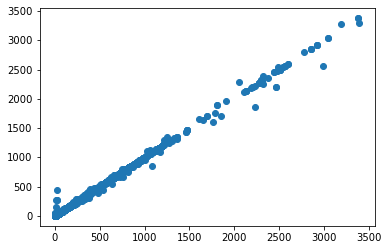

In [196]:
#Random forrest prediction plot
plt.scatter(valid_y,pred_y)

C:\Users\STSC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Uniform_Amount', ylabel='Density'>

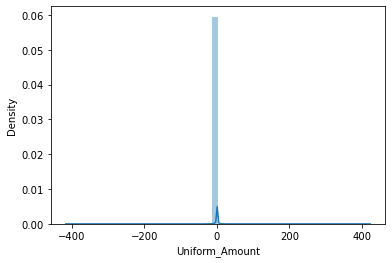

In [197]:
import seaborn as sns
sns.distplot(valid_y-pred_y)

In [198]:
import joblib

In [199]:
df.head()

,Material,Valid_to,Valid_From,Proc_status,Amount,Unit,exchange_rate,Uniform_Amount,Total_Sales
0,1,31129999,25102021,5.0,9.00,17,1.0,9.00,2944.84095
1,2,31129999,2082021,5.0,27.40,17,1.0,27.40,1311.44810
2,3232,31129999,2082021,5.0,28.74,17,1.0,28.74,2832.41160
3,5263,31129999,7122021,5.0,10.04,17,1.0,10.04,237.54000
4,5855,31129999,7122021,5.0,10.00,17,1.0,10.00,121.85000


In [205]:
import pickle
pickle.dump(df_lm,open("Price Optimization Project.pkl","wb"))

In [207]:
pickle.dump(rfr,open("Price Optimization.pkl","wb"))

In [215]:
pickle.dump(dt,open("Price Optimization_dt.pkl","wb"))